In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\historical_automobile_sales.csv")

In [3]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

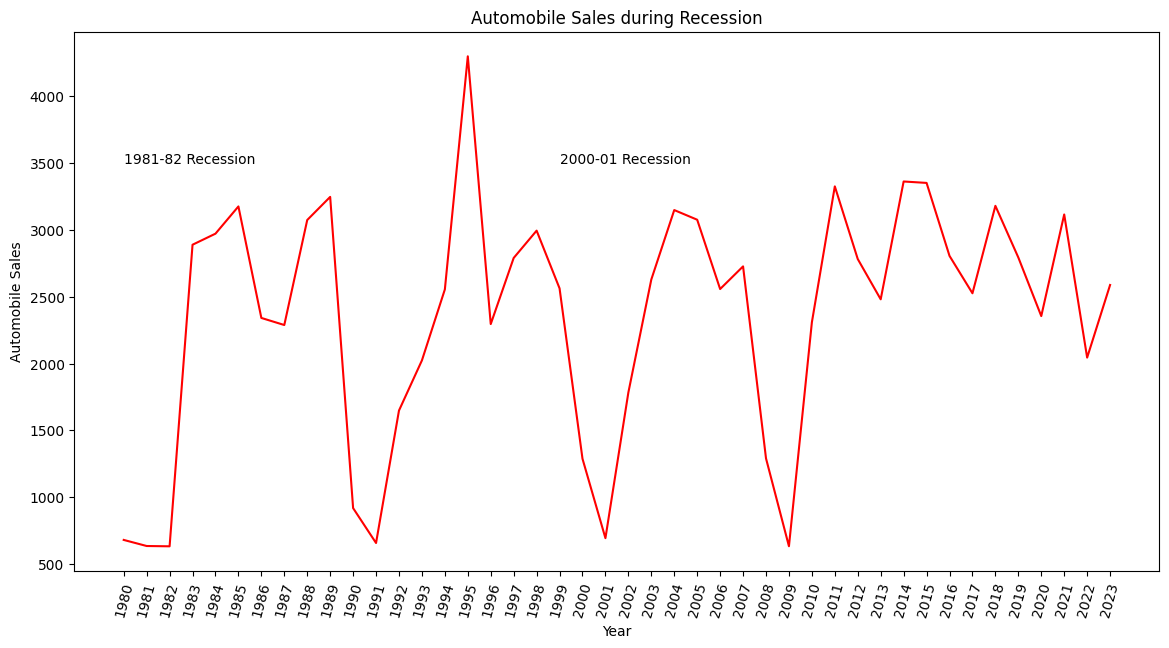

In [22]:
plt.figure(figsize=(14,7))
df_line = df.groupby("Year")["Automobile_Sales"].mean()
df_line.plot(kind="line", color="red")
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.text(1980, 3500, "1981-82 Recession")
plt.text(1999, 3500, "2000-01 Recession")
plt.title("Automobile Sales during Recession")
plt.show()

### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

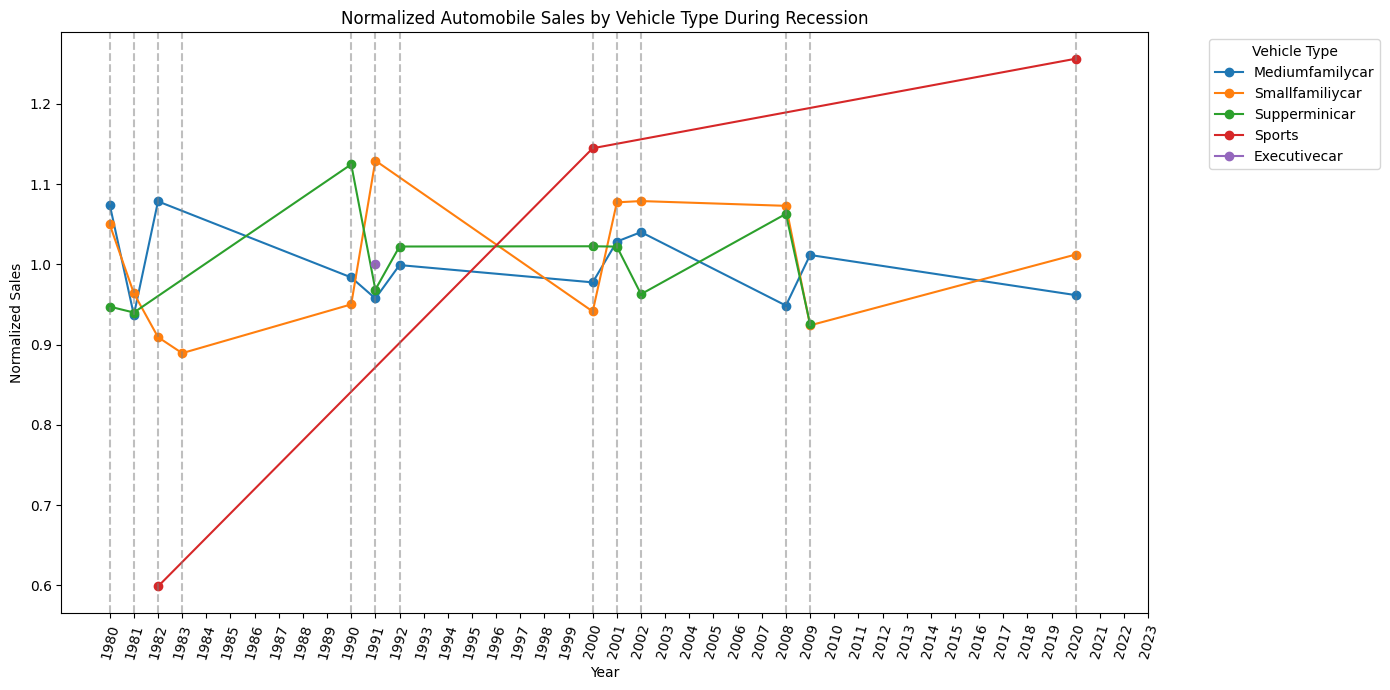

In [33]:
df_rec = df[df["Recession"]==1]
df_Mline = df_rec.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
df_Mline["Normalized_Sales"] = df_Mline.groupby("Vehicle_Type")["Automobile_Sales"].transform(lambda x: x / x.mean())
df_Mline.set_index("Year", inplace=True)

plt.figure(figsize=(14,7))
for vehicle_type in df_Mline["Vehicle_Type"].unique():
    data = df_Mline[df_Mline["Vehicle_Type"]==vehicle_type]
    plt.plot(data.index, data["Normalized_Sales"], label=vehicle_type, marker="o")

recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.xticks(list(range(1980,2024)), rotation=75)

plt.tight_layout()
plt.show()

### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

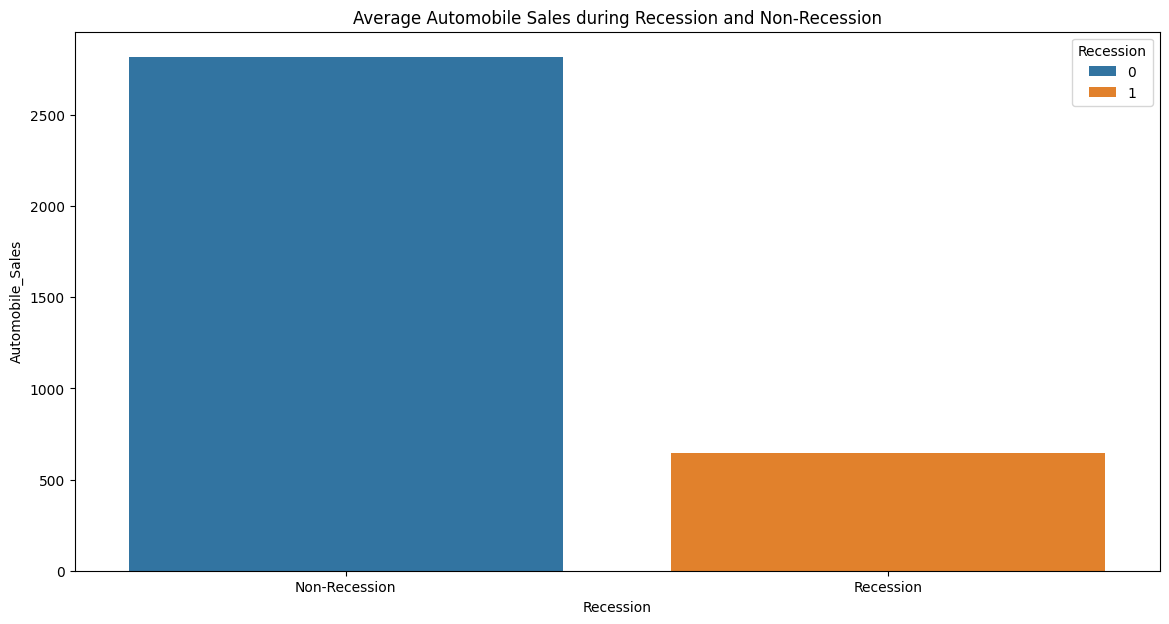

In [34]:
new_df = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=new_df, x="Recession", y="Automobile_Sales", hue="Recession")
plt.xlabel("Recession")
plt.ylabel("Automobile_Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession")
plt.xticks(ticks=[0,1], labels=["Non-Recession", "Recession"])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period

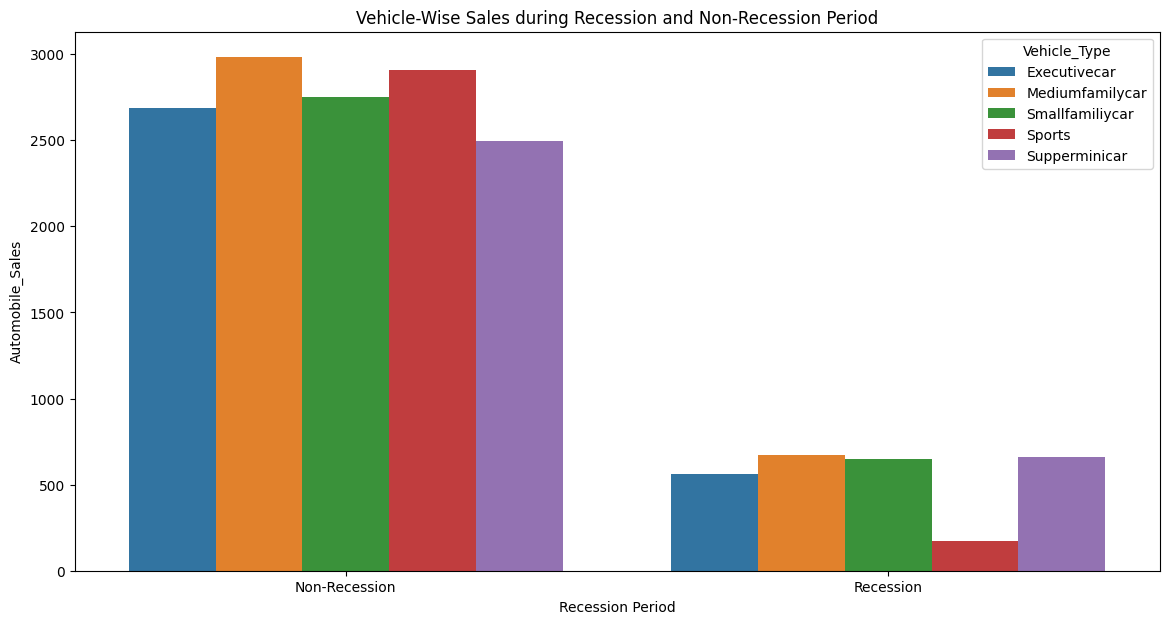

In [45]:
recession_data = df[df["Recession"]==1]
df_new = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()
plt.figure(figsize=(14,7))
sns.barplot(data=df_new, x="Recession", y="Automobile_Sales", hue="Vehicle_Type")
plt.xlabel("Recession Period")
plt.ylabel("Automobile_Sales")
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0,1], labels=["Non-Recession", "Recession"])
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

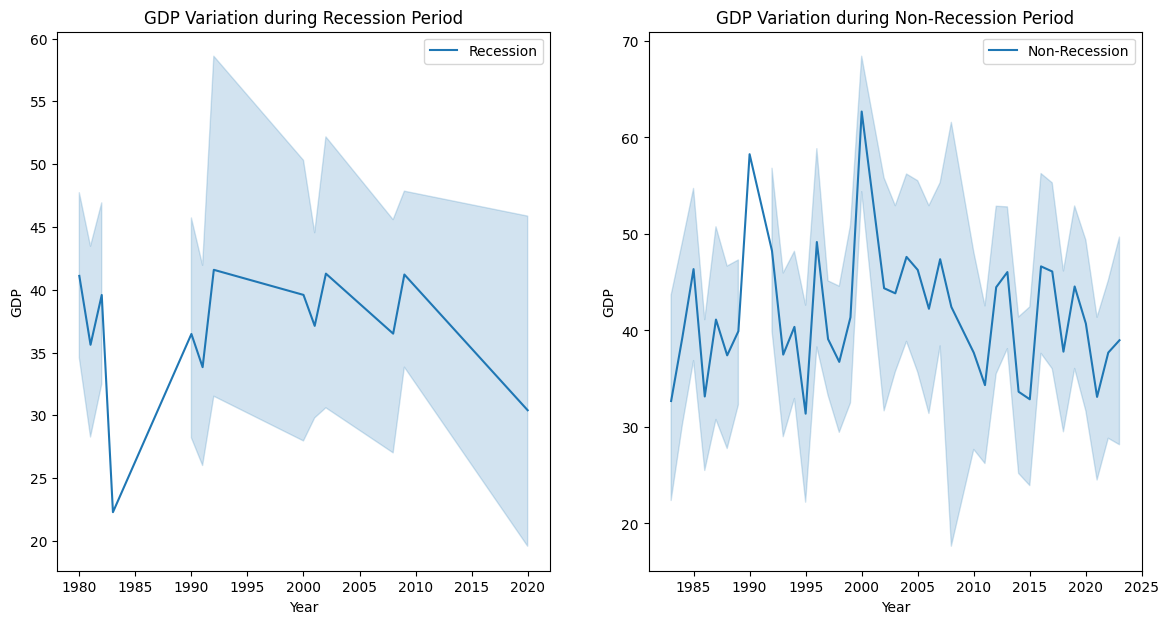

In [51]:
rec_data = df[df["Recession"]==1]
non_rec_data = df[df["Recession"]==0]

fig=plt.figure(figsize=(14,7))

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#plt.subplot(1, 2, 1)
sns.lineplot(data=rec_data, x="Year", y="GDP", label="Recession", ax=ax0)
ax0.set_xlabel("Year")
ax0.set_ylabel("GDP")
ax0.set_title("GDP Variation during Recession Period")

#plt.subplot(1, 2, 2)
sns.lineplot(data=non_rec_data, x="Year", y="GDP", label="Non-Recession", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP")
ax1.set_title("GDP Variation during Non-Recession Period")

plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

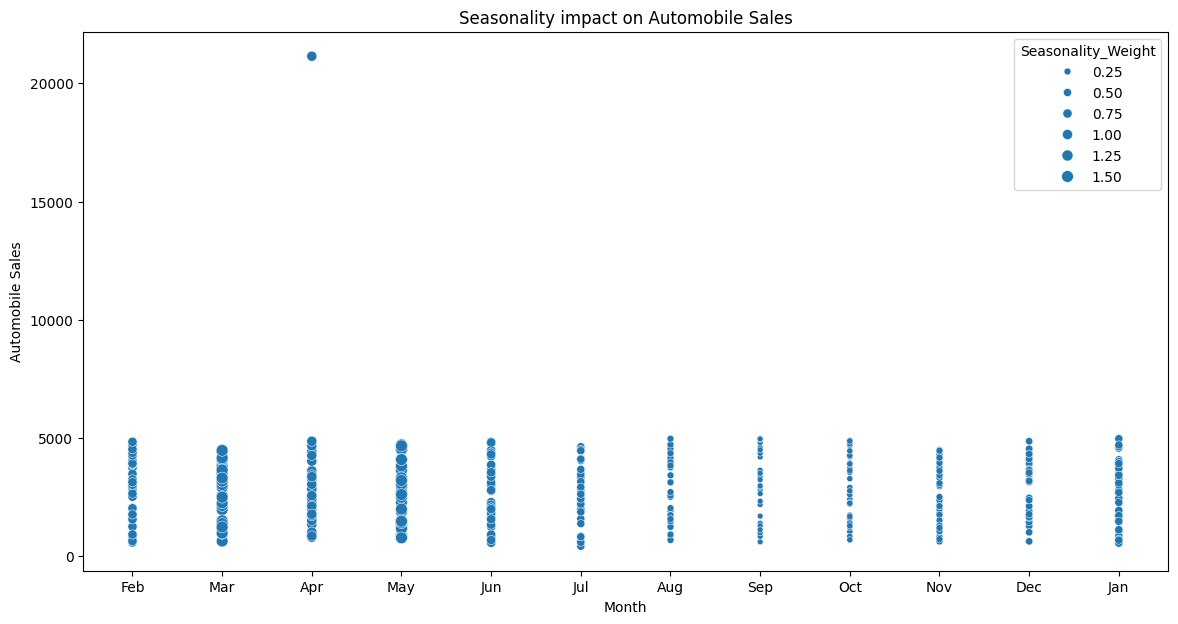

In [54]:
non_rec_data = df[df["Recession"]==0]
size = non_rec_data["Seasonality_Weight"]
plt.figure(figsize=(14,7))
sns.scatterplot(data=non_rec_data, x="Month", y="Automobile_Sales", size=size)
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Seasonality impact on Automobile Sales")
plt.show()

### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

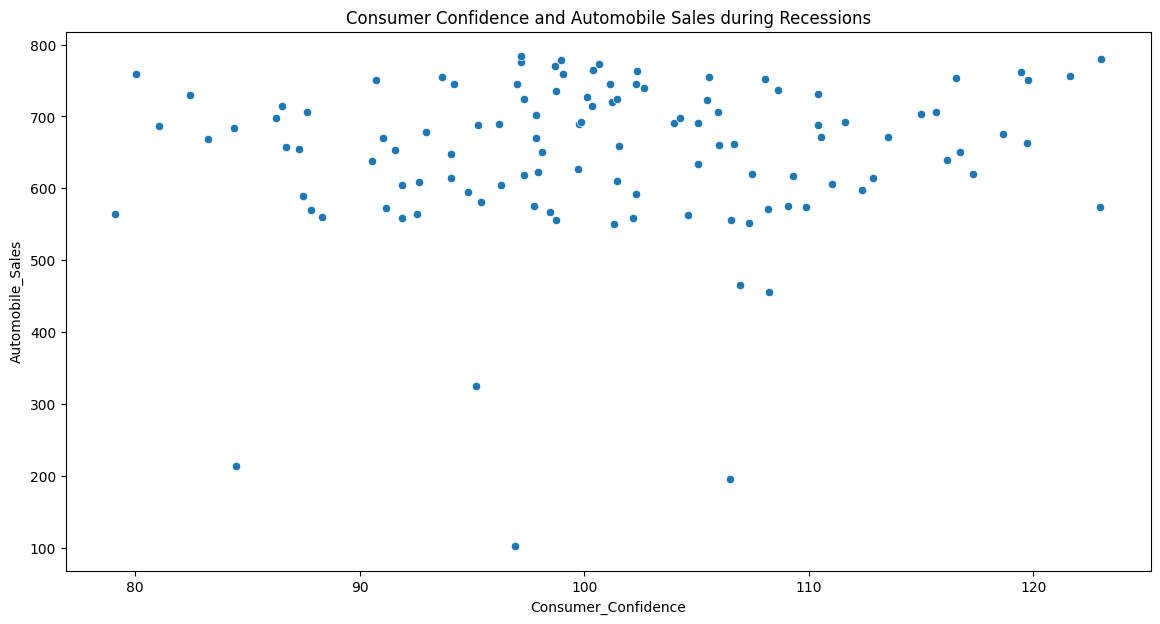

In [57]:
rec_data = df[df["Recession"]==1]
plt.figure(figsize=(14,7))
sns.scatterplot(data=rec_data, x="Consumer_Confidence", y="Automobile_Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

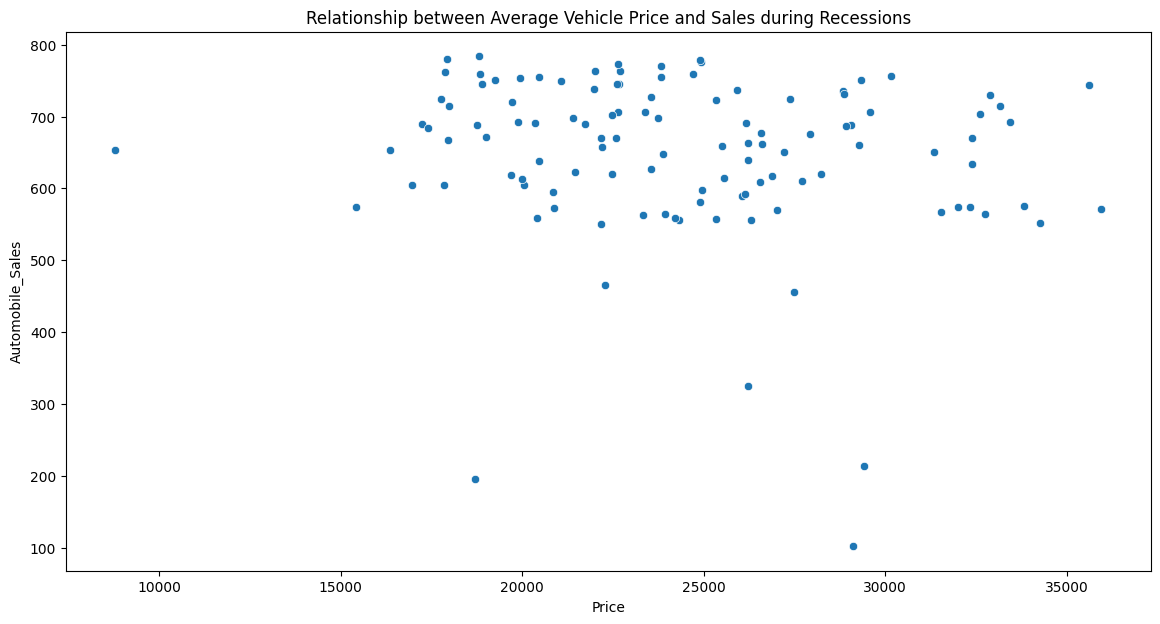

In [60]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(14,7))

sns.scatterplot(data=rec_data, x="Price", y="Automobile_Sales")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.show()

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

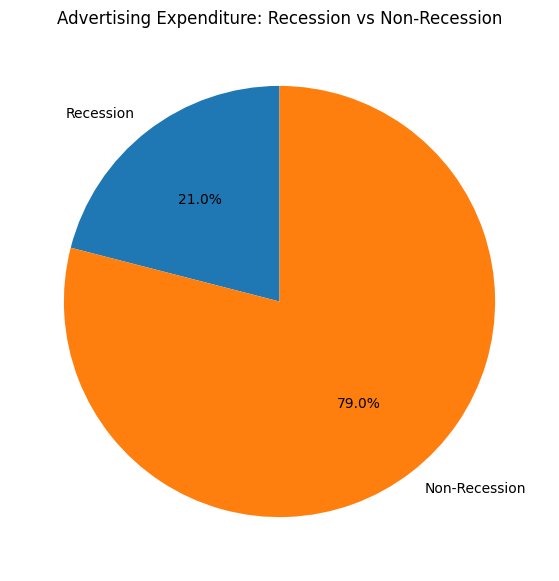

In [61]:
Rdata = df[df["Recession"]==1]
NRdata = df[df["Recession"]==0]

RAtotal = Rdata["Advertising_Expenditure"].sum()
NRAtotal = NRdata["Advertising_Expenditure"].sum()

plt.figure(figsize=(14,7))
labels = ["Recession", "Non-Recession"]
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Advertising Expenditure: Recession vs Non-Recession")
plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

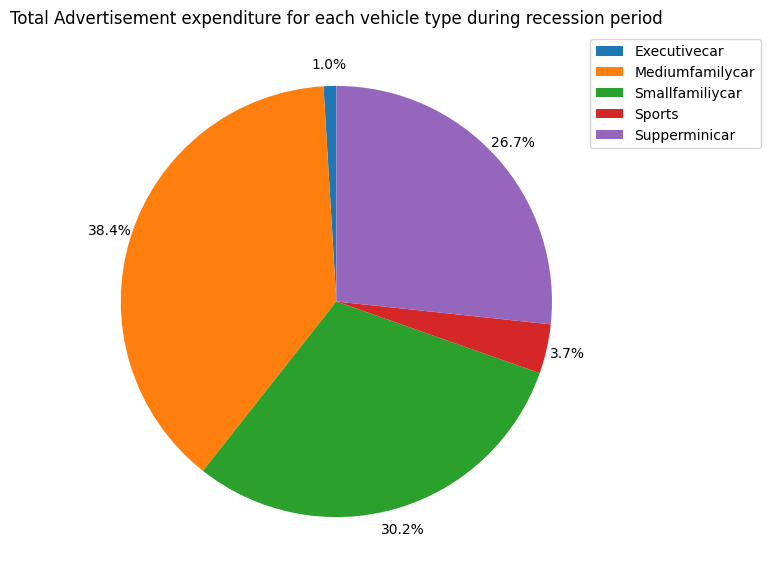

In [72]:
rec = df[df["Recession"]==1]
tae = rec.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.figure(figsize=(14,7))

labels = tae.index
sizes = tae.values
plt.pie(sizes, labels=None, autopct="%1.1f%%", startangle=90, pctdistance=1.10)
plt.title("Total Advertisement expenditure for each vehicle type during recession period")
plt.legend(labels=tae.index, bbox_to_anchor=(1.30, 1), loc="upper right")
plt.show()

### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

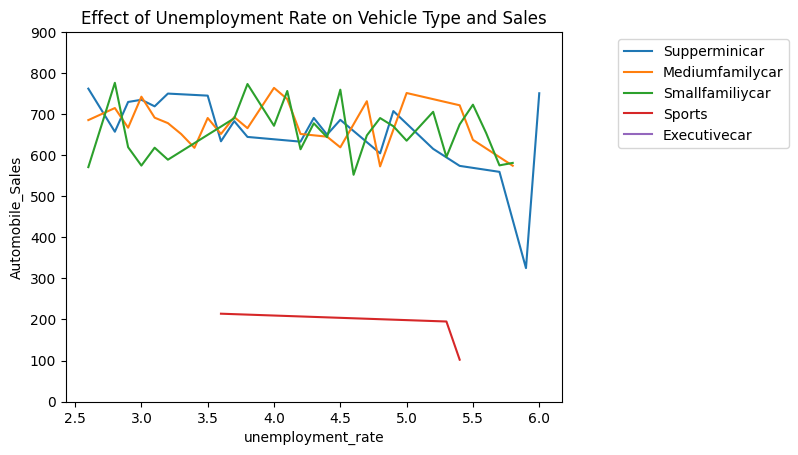

In [79]:
rec = df[df["Recession"]==1]
sns.lineplot(data=rec, x="unemployment_rate", y="Automobile_Sales", hue="Vehicle_Type", markers="o", err_style=None)
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.ylim(0,900)
plt.legend(bbox_to_anchor=(1.10,1))
plt.show()